**Course**: Data Visualization (Prof. Dr. Heike Leitte, Jan-Tobias Sohns, TU Kaiserslautern),   **Name**: XXX XXX,   **Date**: XX.XX.2020

<div class="alert alert-info">

    
# Assignment 3 - Exploratory data analysis of the Titanic dataset
</div>

> The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.

![](NYT_titanic.png)

source: [wikipedia.org](https://en.wikipedia.org/wiki/RMS_Titanic)


### Outline and goals

In the third assignment, we will explore the titanic dataset using exploratory data analysis. The goals of this exercise are:
- conduct exploratory data analysis using python's seaborn library
- make a structured analysis (of a subset) of a given dataset
- contrast subgroups of data
- find patterns and outliers in data

<div class="alert alert-danger">

**Important**: While no points will be awarded for typing the correct answers in the notebooks, it is highly advised to solve the tasks thoroughly. They are designed to be encouraging and provide you with valuable learnings for the exam, understanding of the methods and practical coding.
</div>

<div class="alert alert-success">
    
All tasks in this notebook are marked in green.
</div>

<div class="alert alert-info">
    
## 1. Load the data
</div>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Description of the titanic dataset:
survived - Survival (0 = No; 1 = Yes)<br>
plass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)<br>
sex - Gender<br>
age - Age<br>
sibsp - Number of Siblings/Spouses Aboard<br>
parch - Number of Parents/Children Aboard<br>
fare - Passenger fare<br>
embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)<br>
class - Class as string<br>
who - Type of person (child, man, woman)<br>
adult_male - Passenger is an adult male<br>
deck - Deck of passenger's accomodation<br>
embark_town - Port of Embarkation as string<br>
alive - Boolean<br>
alone - Person travelled alone<br>

<div class="alert alert-info">
    
## 2. Get an overview
</div>

The command [`pandas.DataFrame.dtypes`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) returns the data types as inferred by pandas.

<div class="alert alert-success">
    
Check if the inferred types match with the ones you would have assigned to each column.
</div>

In [ ]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

The command [`pandas.DataFrame.describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) provides summary statistics for all attributes.

In [ ]:
titanic.describe(include="all")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-warning">

...
</div>

<div class="alert alert-success">

    
Which columns contain missing values, commonly NaN? Hint: Consider the 'count' row of `describe`.
</div>

In [ ]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
titanic.isna().sum().sum()

869

In [ ]:
missingValues = titanic.isnull().sum().sort_values(ascending=False)
percent = (titanic.isnull().sum() / titanic.isnull().count()).sort_values(ascending=False)
percent = round((percent*100), 2)
missing = pd.concat([missingValues, percent], axis = 1, keys = ['TotalMissing', 'PercentMissing'])
missing

,TotalMissing,PercentMissing
deck,688,77.22
age,177,19.87
embarked,2,0.22
embark_town,2,0.22
survived,0,0.00
pclass,0,0.00
sex,0,0.00
sibsp,0,0.00
parch,0,0.00
fare,0,0.00


<AxesSubplot:>

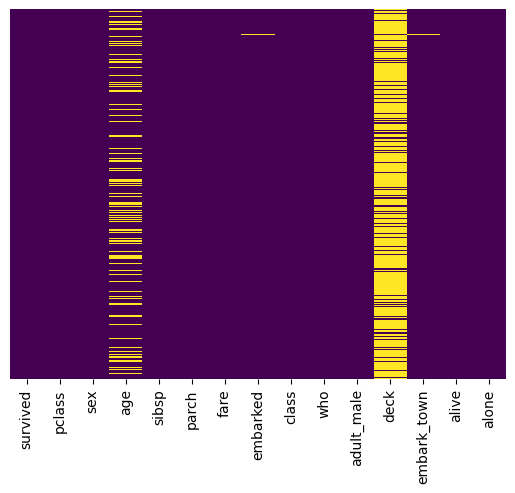

In [ ]:
sns.heatmap(titanic.isnull(), yticklabels = False, cbar =False, cmap ='viridis')

<div class="alert alert-warning">

...
</div>

<div class="alert alert-success">

What are the names of the different decks and how many people were assigned to each deck? Does every passenger have an assigned deck?
</div>

Hint: The method [`pandas.Series.value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) may be helpful.

In [ ]:
titanic['deck'].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [ ]:
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [ ]:
titanic['deck'].value_counts(dropna = False)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

<div class="alert alert-warning">

...Question: Does every passenger have an assigned deck?      
...Answer: NO.  
...Reason: Based on the above result.
</div>

<div class="alert alert-info">
    
## 3. Analyze variables individually
</div>

First we look into some of the variables individually. We will not cover the entire dataset in detail which would exceed the scope of an assignment, but concentrate on some aspects of it.

**Hints**:
- [documentation of countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot)
- [list of seaborn plots](https://seaborn.pydata.org/api.html#relational-api)
- [Seaborn cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf)

**Examples**:

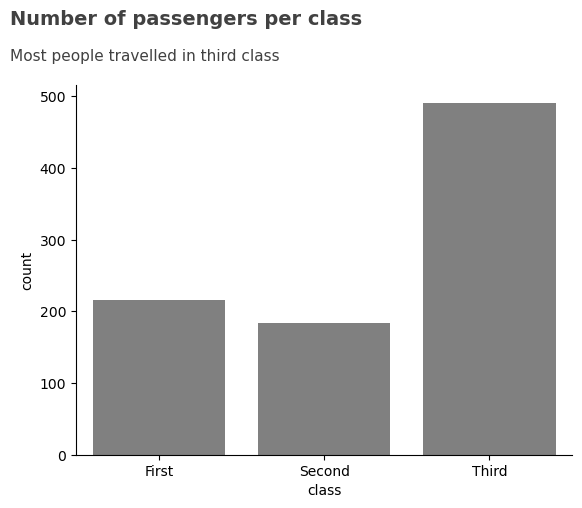

In [ ]:
ax = sns.countplot(x="class", data=titanic, color="gray")
ax.text(x=-.9, y=600, s="Number of passengers per class", fontsize=14, fontweight='semibold', color='#414141')
ax.text(x=-.9, y=550, s="Most people travelled in third class", fontsize=11, fontweight='normal', color='#414141')
sns.despine()

<div class="alert alert-success">
    
Finish the histogram below.
- Set an appropriate number of bins and add a subtitle that tells about one finding.
- Can you detect different price groups?  YES
</div>

In [ ]:
titanic.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

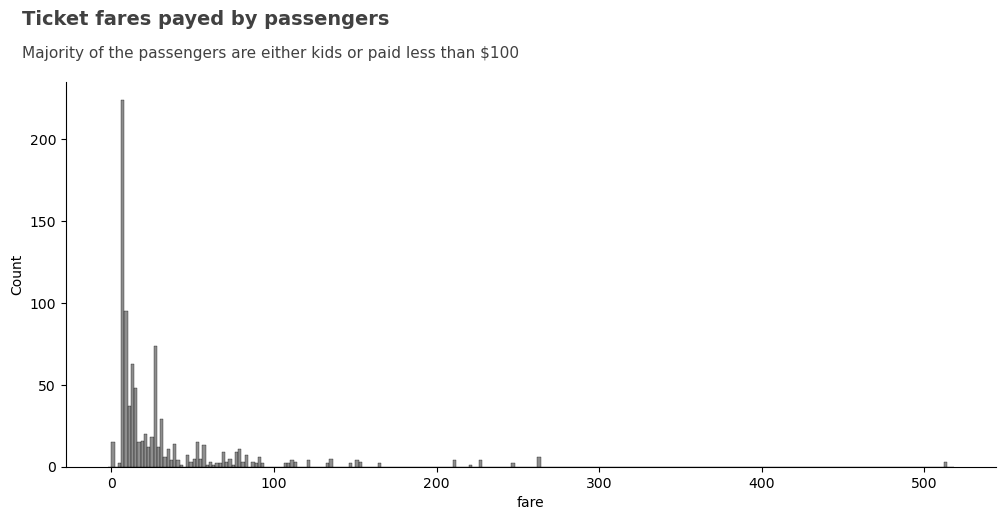

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.histplot(data=titanic["fare"], color="dimgray", bins=np.arange(-2.0,520,2))
ax.text(x=-55, y=270, s="Ticket fares payed by passengers", fontsize=14, fontweight='semibold', color='#414141')
ax.text(x=-55, y=250, s="Majority of the passengers are either kids or paid less than $100", fontsize=11,
        fontweight='normal', color='#414141')
sns.despine()

<div class="alert alert-success">
    
Select two columns/variables from the dataset and plot each with an appropriate chart (= two 1D-histograms, explore more if you want). Check that chart parameters are set appropriately. Add a matching title to your charts and state one finding in the subtitle.
</div>

In [ ]:
list(titanic)

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

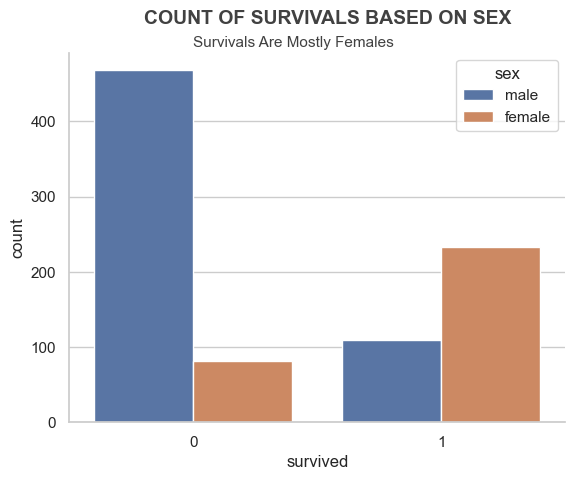

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="survived", hue = 'sex', data=titanic)
ax.text(x=-.2, y=530, s="COUNT OF SURVIVALS BASED ON SEX", fontsize=14, fontweight='semibold', color='#414141')
ax.text(x=0, y=500, s="Survivals Are Mostly Females", fontsize=11, fontweight='normal', color='#414141')
sns.despine()

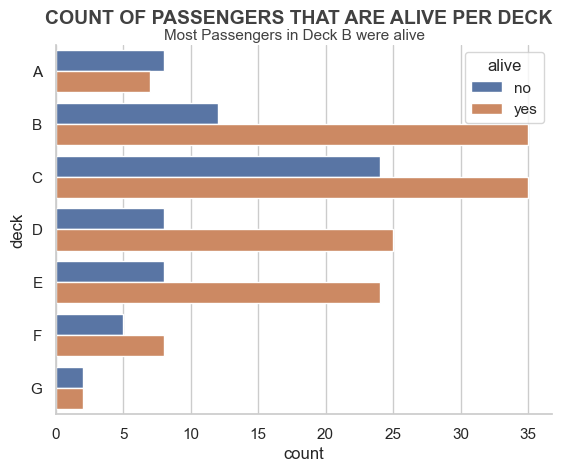

In [ ]:
# COUNT OF PASSENGERS THAT ARE ALIVE PER DECK
sns.set_theme(style="whitegrid")
ax = sns.countplot(y="deck", hue = 'alive', data=titanic)
ax.text(x=-.8, y=-.9, s="COUNT OF PASSENGERS THAT ARE ALIVE PER DECK", fontsize=14, fontweight='semibold', color='#414141')
ax.text(x=8, y=-.6, s="Most Passengers in Deck B were alive", fontsize=11, fontweight='normal', color='#414141')
sns.despine()

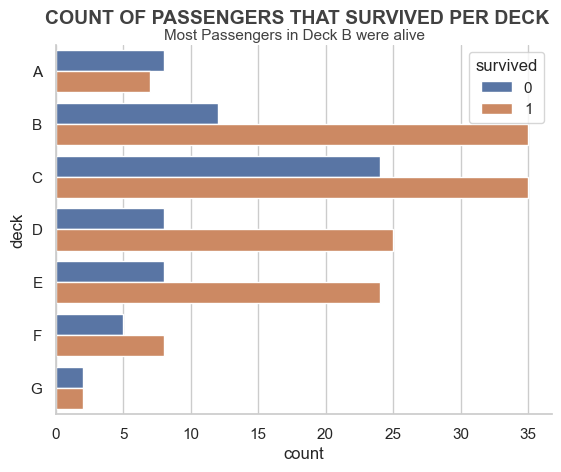

In [ ]:
# COUNT OF PASSENGERS THAT SURVIVED PER DECK
sns.set_theme(style="whitegrid")
ax = sns.countplot(y="deck", hue = 'survived', data=titanic)
ax.text(x=-.8, y=-.9, s="COUNT OF PASSENGERS THAT SURVIVED PER DECK", fontsize=14, fontweight='semibold', color='#414141')
ax.text(x=8, y=-.6, s="Most Passengers in Deck B were alive", fontsize=11, fontweight='normal', color='#414141')
sns.despine()

In [ ]:
titanic.groupby('class').mean()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,0.629630,1.0,38.233441,0.416667,0.356481,84.154687,0.550926,0.504630
Second,0.472826,2.0,29.877630,0.402174,0.380435,20.662183,0.538043,0.565217
Third,0.242363,3.0,25.140620,0.615071,0.393075,13.675550,0.649695,0.659878


In [ ]:
# FEMALE ARE MUCH MORE LIKELY TO SURVIVE THAN MEN, ESPECIALLY WOMEN IN THE FIRST & SECOND CLASSES .
# It also shows that men in the first class are almost 3-times more likely to survive than men in the third class

titanic.groupby(['sex','class']).mean()

survived  pclass        age     sibsp     parch        fare  \
sex    class                                                                 
female First   0.968085     1.0  34.611765  0.553191  0.457447  106.125798   
       Second  0.921053     2.0  28.722973  0.486842  0.605263   21.970121   
       Third   0.500000     3.0  21.750000  0.895833  0.798611   16.118810   
male   First   0.368852     1.0  41.281386  0.311475  0.278689   67.226127   
       Second  0.157407     2.0  30.740707  0.342593  0.222222   19.741782   
       Third   0.135447     3.0  26.507589  0.498559  0.224784   12.661633   

               adult_male     alone  
sex    class                         
female First     0.000000  0.361702  
       Second    0.000000  0.421053  
       Third     0.000000  0.416667  
male   First     0.975410  0.614754  
       Second    0.916667  0.666667  
       Third     0.919308  0.760807

In [ ]:
titanic['pclass'].value_counts(dropna = False)

3    491
1    216
2    184
Name: pclass, dtype: int64

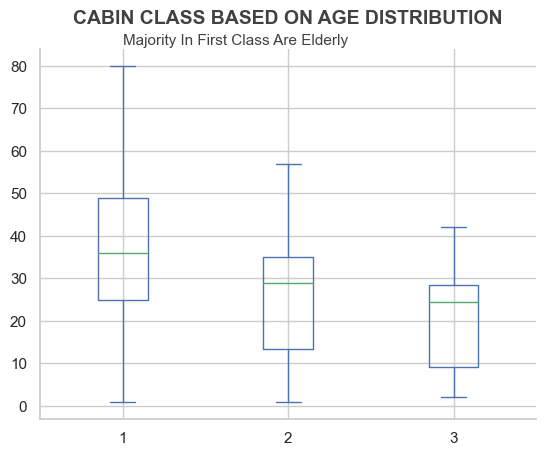

In [ ]:
# GET THE PCLASS BASED ON AGE DISTRIBUTION
sns.set_theme(style="whitegrid")
ax = titanic.dropna().pivot(columns = 'pclass', values = 'age').plot(kind = 'box')
ax.text(x=.7, y=90, s="CABIN CLASS BASED ON AGE DISTRIBUTION", fontsize=14, fontweight='semibold', color='#414141')
ax.text(x=1, y=85, s="Majority In First Class Are Elderly", fontsize=11, fontweight='normal', color='#414141')
sns.despine()

<div class="alert alert-info">
    
## 4. Who did survive?
</div>

For each question below, create a chart in the axes above that helps you answer the questions. It is ok to stick to the [plots implemented in seaborn](https://seaborn.pydata.org/api.html). Some plots, like stacked bar charts, require more work.

<div class="alert alert-success">
    
Who had the highest chance of survival: men, women, or children? Hint: You can add another dimension to you `displot` or `countplot` by coloring bars with 'hue=column_name'.
</div>

In [ ]:
titanic.who.unique()

array(['man', 'woman', 'child'], dtype=object)

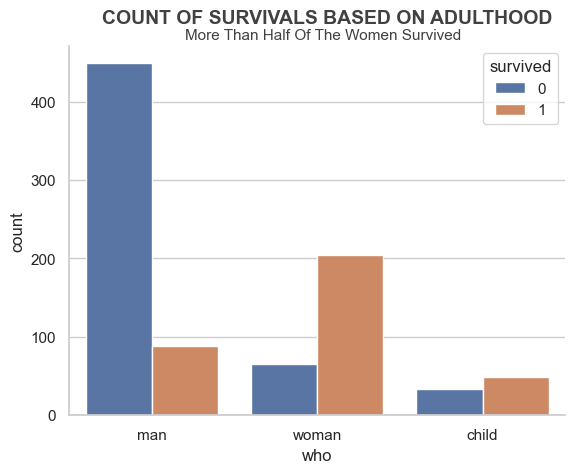

In [ ]:
# GET THE COUNT OF SURVIVALS BASED ON ADULTHOOD
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="who", hue = 'survived', data=titanic)
ax.text(x=-.3, y=500, s="COUNT OF SURVIVALS BASED ON ADULTHOOD", fontsize=14, fontweight='semibold', color='#414141')
ax.text(x=0.2, y=480, s="More Than Half Of The Women Survived", fontsize=11, fontweight='normal', color='#414141')
sns.despine()

<div class="alert alert-success">
    
Did age have an influence? Compare the age of people who survived and those who did not. Is your observation consistent for all three types of people (men, women, children)?
</div>

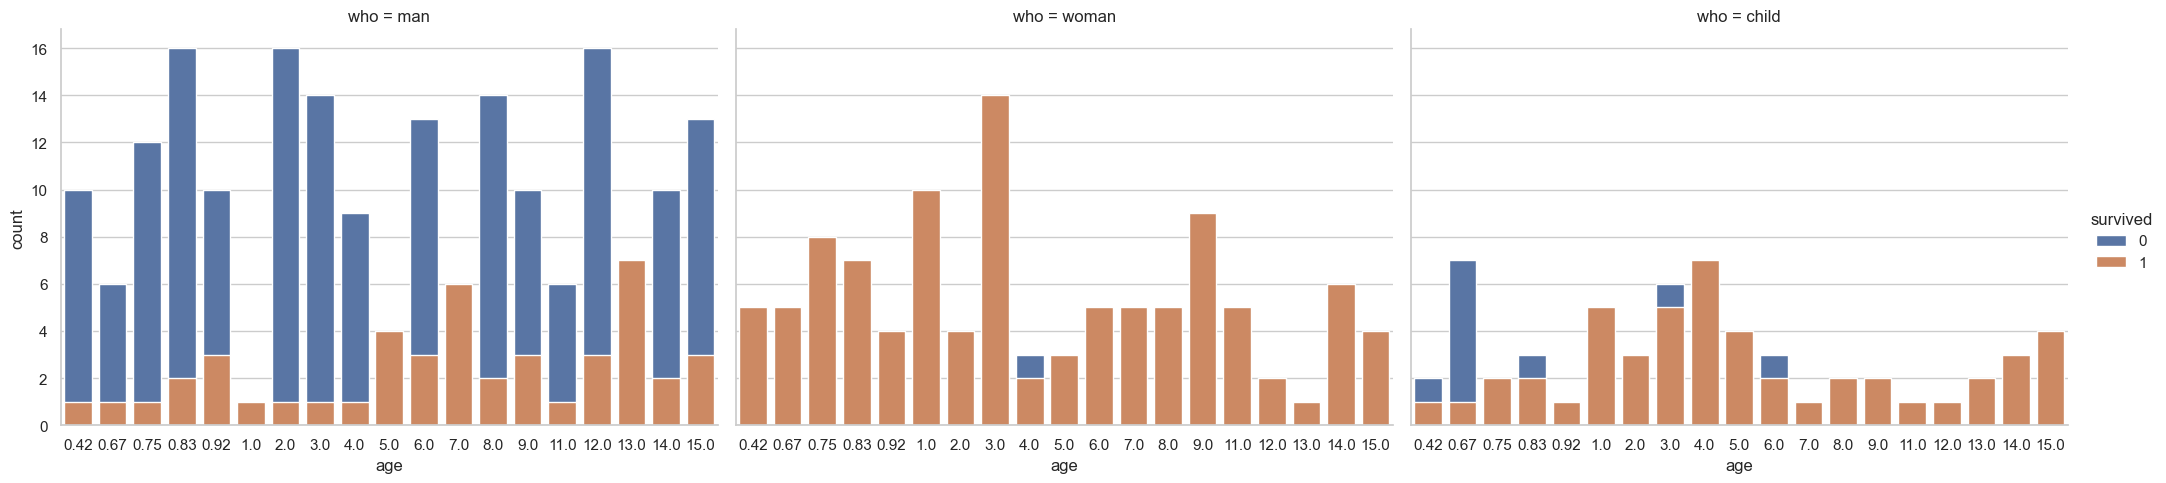

In [ ]:
g = sns.FacetGrid(titanic, col="who", hue="survived", height=5, aspect=1.4)
g.map_dataframe(sns.countplot, x="age")
g.add_legend()

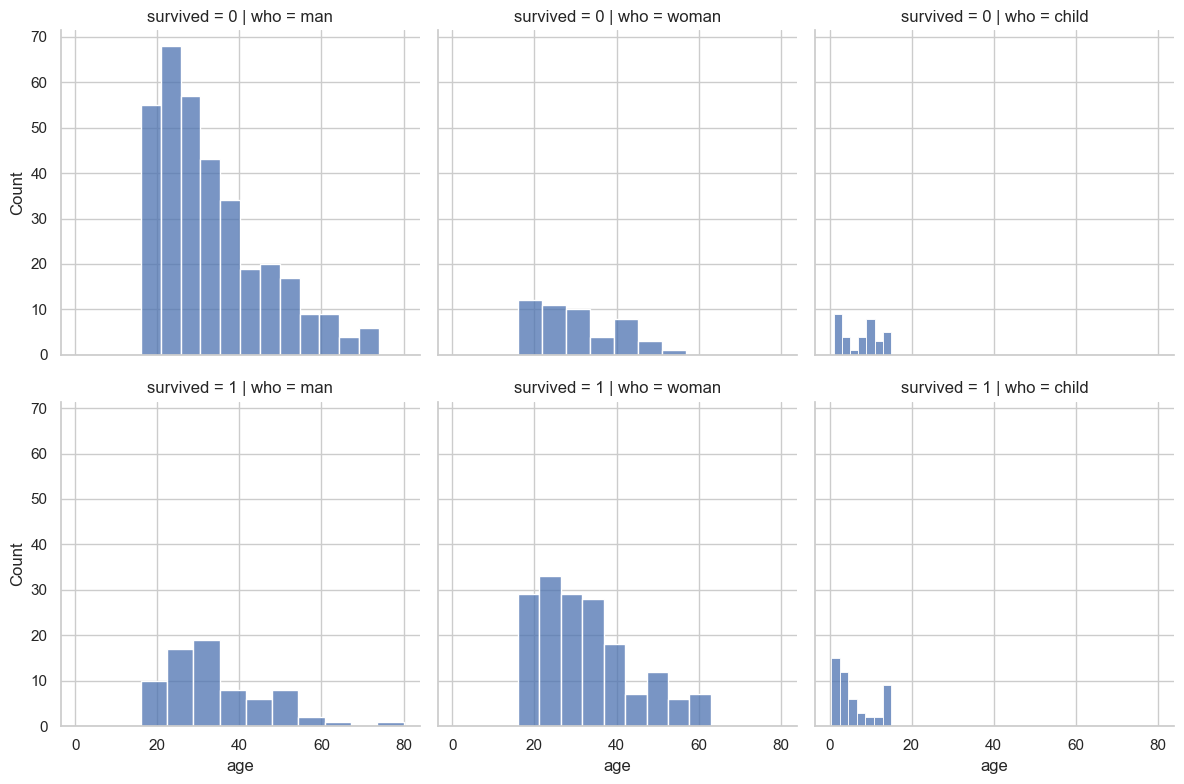

In [ ]:
fig = sns.FacetGrid(titanic, col = 'who', row = 'survived', height = 4)
fig.map(sns.histplot, 'age', bins = 'auto', kde = False)

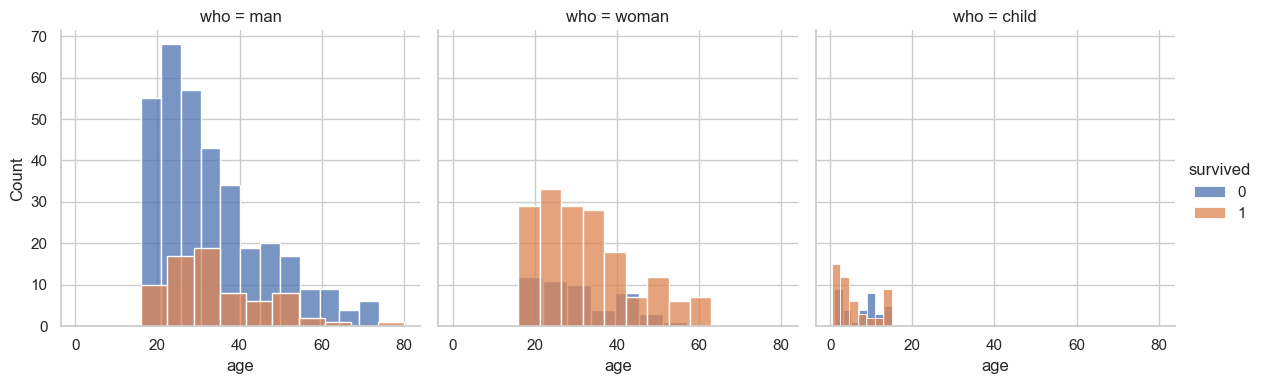

In [ ]:
fig = sns.FacetGrid(titanic, col = 'who', hue = 'survived', height = 4)
fig.map(sns.histplot, 'age', bins = 'auto', kde = False)
fig.add_legend()

<AxesSubplot:xlabel='age', ylabel='Count'>

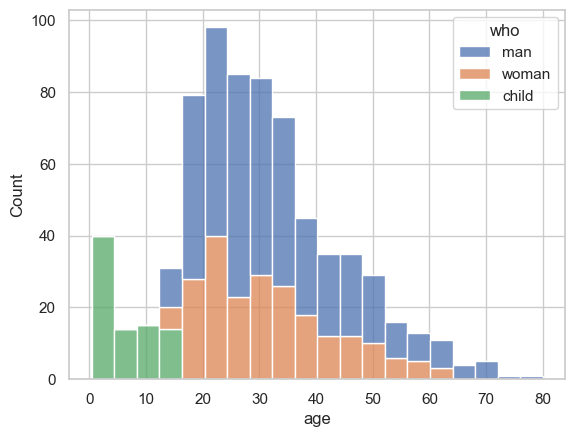

In [ ]:
sns.histplot(data=titanic, x="age", hue="who", multiple="stack")

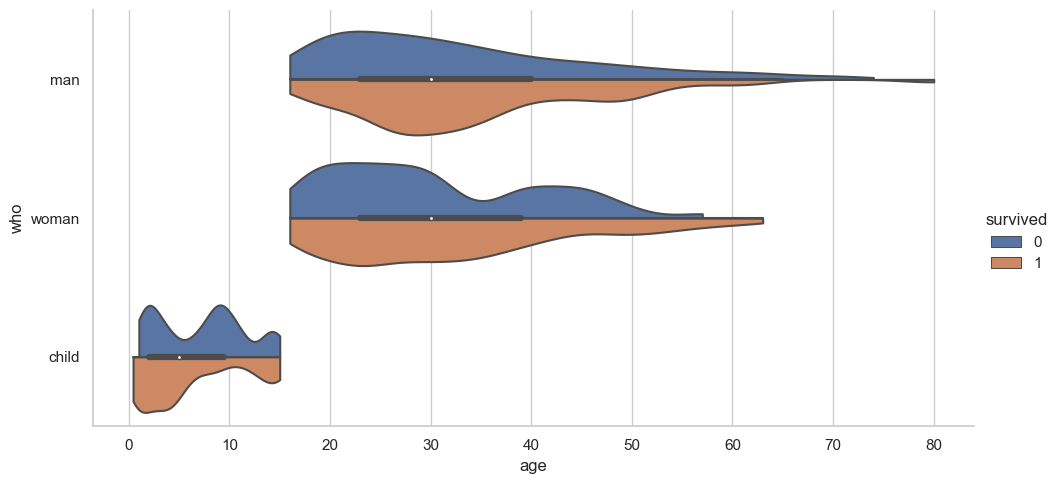

In [ ]:
dv =sns.catplot(data=titanic, x="age", y="who", hue="survived", kind="violin", bw=.25, cut=0,
            height=5, aspect=2, split=True)

dv.savefig("age_influence_on_survival.png")

**Did people on all decks have the same survival rate?**

The probabilities of survival and death can be computed as follows. We count the total number of people in each group ([`pandas.Series.value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) and divide by the total number of passengers:

In [ ]:
titanic['alive'].value_counts() / len(titanic)

no     0.616162
yes    0.383838
Name: alive, dtype: float64

We see that the total survival rate was 38%.

To do the same for each deck, we first to handle NaN-values in the deck entries. We add a new column, that has a categorical entry "None" for all passengers with an unspecified deck entry:

In [ ]:
titanic['deck_all'] = titanic['deck'].cat.add_categories("None").fillna("None")

<div class="alert alert-success">
    
Now compute the survival rates per deck and plot the resulting series using, for example, [`seaborn.barplot`](https://seaborn.pydata.org/generated/seaborn.barplot.html).

</div>

Hints:
- Pandas allows you to filter data. `titanic[ titanic['age'] > 10 ]` returns a series of all passengers that are older than 10 years. This can be used to filter only people that survived.
- You can divide a series by a series elementwise. `titanic['fare'] / titanic['age']` computes for each passanger the fraction fare divided by age (i.e. ticket price per year they lived - which is nonesense, but computable).

In [ ]:
titanic['deck_all'].unique()

['None', 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (8, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'None']

In [ ]:
titanic[titanic['age'] > 18].groupby(['who', 'deck_all']).mean()

survived    pclass        age     sibsp     parch        fare  \
who   deck_all                                                                  
man   A         0.500000  1.000000  48.600000  0.100000  0.000000   34.490000   
      B         0.388889  1.000000  41.777778  0.333333  0.388889  116.004867   
      C         0.260870  1.000000  41.543478  0.652174  0.478261   86.671739   
      D         0.428571  1.142857  38.285714  0.285714  0.428571   54.649407   
      E         0.562500  1.125000  43.312500  0.312500  0.062500   38.385419   
      F         0.000000  2.750000  30.625000  0.000000  0.500000   12.237500   
      G              NaN       NaN        NaN       NaN       NaN         NaN   
      None      0.121212  2.606061  32.412458  0.218855  0.107744   15.086193   
woman A         1.000000  1.000000  48.000000  1.000000  0.000000   39.600000   
      B         1.000000  1.000000  35.700000  0.250000  0.600000  109.248540   
      C         0.909091  1.000000  36.909091  0.727273  0.500000  115.274427   
      D         1.000000  1.125000  41.125000  0.562500  0.187500   62.669800   
      E         0.916667  1.416667  35.541667  0.416667  0.416667   58.267708   
      F         1.000000  2.000000  29.000000  0.000000  0.000000   11.333333   
      G         0.500000  3.000000  26.500000  0.500000  1.500000   13.581250   
      None      0.675214  2.401709  32.012821  0.495726  0.726496   29.019979   

                adult_male     alone  
who   deck_all                        
man   A                1.0  0.900000  
      B                1.0  0.500000  
      C                1.0  0.347826  
      D                1.0  0.428571  
      E                1.0  0.687500  
      F                1.0  0.750000  
      G                NaN       NaN  
      None             1.0  0.797980  
woman A                0.0  0.000000  
      B                0.0  0.550000  
      C                0.0  0.363636  
      D                0.0  0.375000  
      E                0.0  0.416667  
      F                0.0  1.000000  
      G                0.0  0.000000  
      None             0.0  0.444444

In [ ]:
titanic[titanic['age'] < 18].groupby(['sex', 'deck_all']).mean()

survived  pclass     age     sibsp     parch        fare  \
sex    deck_all                                                             
female A              NaN     NaN     NaN       NaN       NaN         NaN   
       B         1.000000    1.00  15.600  0.400000  0.800000  106.563340   
       C         0.500000    1.00   9.500  1.000000  1.000000  130.225000   
       D         1.000000    1.00  16.000  0.000000  1.000000   39.400000   
       E              NaN     NaN     NaN       NaN       NaN         NaN   
       F         1.000000    2.00   4.000  2.000000  1.000000   39.000000   
       G         0.500000    3.00   3.000  0.500000  1.000000   13.581250   
       None      0.659091    2.75   8.750  1.340909  1.068182   20.550380   
male   A         1.000000    1.00   4.000  0.000000  2.000000   81.858300   
       B         1.000000    1.00  11.000  1.000000  2.000000  120.000000   
       C         1.000000    1.00   8.960  0.500000  2.000000  131.216650   
       D              NaN     NaN     NaN       NaN       NaN         NaN   
       E         1.000000    3.00   6.000  0.000000  1.000000   12.475000   
       F         1.000000    2.00   2.000  1.333333  1.000000   30.333333   
       G              NaN     NaN     NaN       NaN       NaN         NaN   
       None      0.300000    2.84   9.375  1.860000  1.000000   23.142754   

                 adult_male     alone  
sex    deck_all                        
female A                NaN       NaN  
       B               0.00  0.200000  
       C               0.00  0.000000  
       D               0.00  0.000000  
       E                NaN       NaN  
       F               0.00  0.000000  
       G               0.00  0.000000  
       None            0.00  0.227273  
male   A               0.00  0.000000  
       B               0.00  0.000000  
       C               0.50  0.000000  
       D                NaN       NaN  
       E               0.00  0.000000  
       F               0.00  0.000000  
       G                NaN       NaN  
       None            0.34  0.240000

<AxesSubplot:xlabel='count', ylabel='deck_all'>

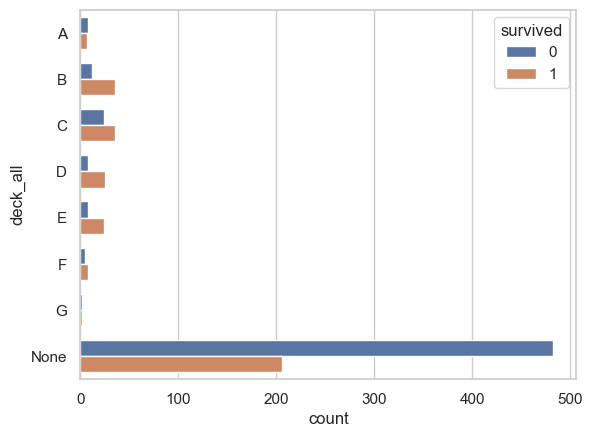

In [ ]:
sns.countplot(data=titanic, y="deck_all", hue="survived", width=.7)

<div class="alert alert-info">
    
## 4. Fake news?
</div>

You talk to a friend about the titanic dataset and he/she says:
> It's so unfair. Only elderly people could afford First Class tickets and have a good trip on the Titanic.

<div class="alert alert-success">
    
Briefly discuss this statement. Write approximately 10-15 lines.
</div>

Hint:
- Explanation of **Discuss**: Essentially this is a written debate where you are using your skill at reasoning, backed up by carefully selected evidence to make a case for and against an argument, or point out the advantages and disadvantages of a given context. Remember to arrive at a conclusion. source (not necessary to read): [Essay terms explained by University of Leicester](https://www2.le.ac.uk/projects/oer/oers/ssds/oers/writing-skills/writingskillscg.pdf)


### Answer:
<div class="alert alert-warning">

...BASED ON THE ANALYSIS DONE BELOW, IT IS OBSERVED THAT THE FIRST CLASS REPRESENTS APPROXIMATELY 24% OF THE TOTAL PASSENGERS
    ON BOARD, AND APROXIMATELY 40% OF THE TOTAL SURVIVORS. HENCE, IT'S OBVIOUS THERE IS A CLEAR CORRELATION BETWEEN DEATH AND
    TICKET CLASS: THE HIGHER YOUR TICKET CLASS, THE HIGHER YOUR CHANCES OF SURVIVAL. ALSO, THE ANALYSIS BELOW SHOW THAT
    PASSENGERS IN FIRST CLASS ARE MOSTLY OLDER THAN 40 YEARS. CORRESPONDINGLY, IN YOUR WORDS, ONLY THE ELDERLY COULD AFFORD  
    FIRST CLASS TICKETS AND ENJOY THE TRIP (ON THE TITANIC).
    
...THE ABOVE OBSERVATION CORROBORATES YOUR CLAIM AND ITS OBVIOUS PASSENGERS OLDER THAN 40 YEARS AND WITH FIRST CLASS TICKETS       WERE GIVEN PRIORITY
</div>

### Supporting charts:

In [ ]:
def get_counts(dataframe, factor, class_code, filters):

    target = dataframe[factor].where(dataframe[factor] == class_code)
    class_count = target.where(dataframe['age'] > filters).count()
    return class_count

class1_age_distrib_count = get_counts(titanic, 'pclass', 1, 40)
class2_age_distrib_count = get_counts(titanic, 'pclass', 2, 40)
class3_age_distrib_count = get_counts(titanic, 'pclass', 3, 40)

print('AGE DISTRIBUTION BY CLASS')
print('Count of Passenger In First Class Older Than 40:', class1_age_distrib_count)
print('Count of Passenger In Second Class Older Than 40:', class2_age_distrib_count)
print('Count of Passenger In Third Class Older Than 40:', class3_age_distrib_count)

AGE DISTRIBUTION BY CLASS
Count of Passenger In First Class Older Than 40: 76
Count of Passenger In Second Class Older Than 40: 34
Count of Passenger In Third Class Older Than 40: 40


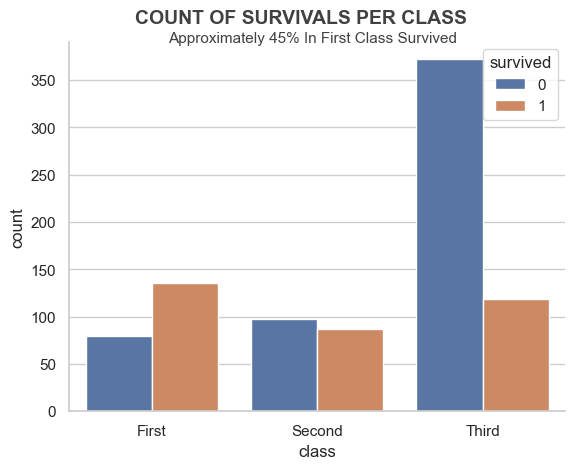

In [ ]:
# GET THE COUNT OF SURVIVALS BASED ON ADULTHOOD
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="class", hue = 'survived', data=titanic)
ax.text(x=-.1, y=410, s="COUNT OF SURVIVALS PER CLASS", fontsize=14, fontweight='semibold', color='#414141')
ax.text(x=0.1, y=390, s="Approximately 45% In First Class Survived", fontsize=11, fontweight='normal', color='#414141')
sns.despine()

In [ ]:
# suggestions: countplot, displot, histplot, scatterplot, boxplot, jointplot

### PERSONAL FINDINGS USED IN ANSWERING THE QUESTIONNAIRE

In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='fare', ylabel='Count'>

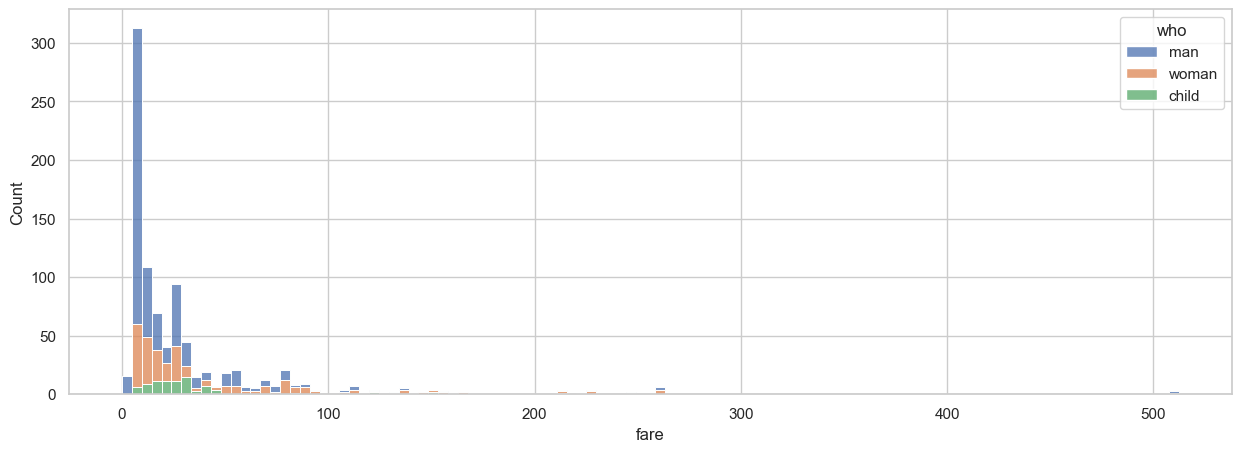

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(data=titanic, x="fare", hue="who", multiple="stack", ax=ax)

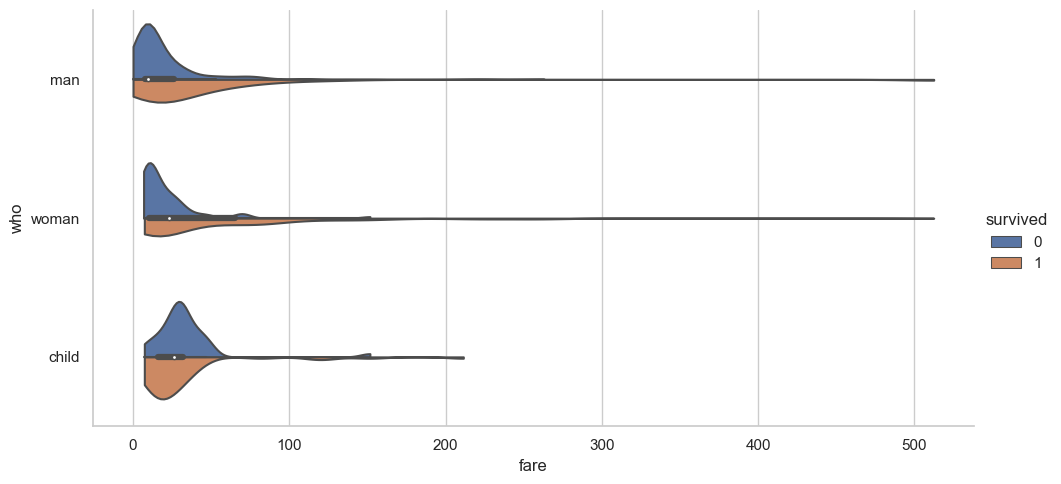

In [ ]:
sns.catplot(data=titanic, x="fare", y="who", hue="survived", kind="violin", bw=.25, cut=0,
            height=5, aspect=2, split=True)